In [ ]:
import librosa
import matplotlib.pyplot as plt

In [ ]:
wav_arr, sr = librosa.load(librosa.ex('trumpet'))

In [ ]:
print(wav_arr.shape, sr)

(117601,) 22050


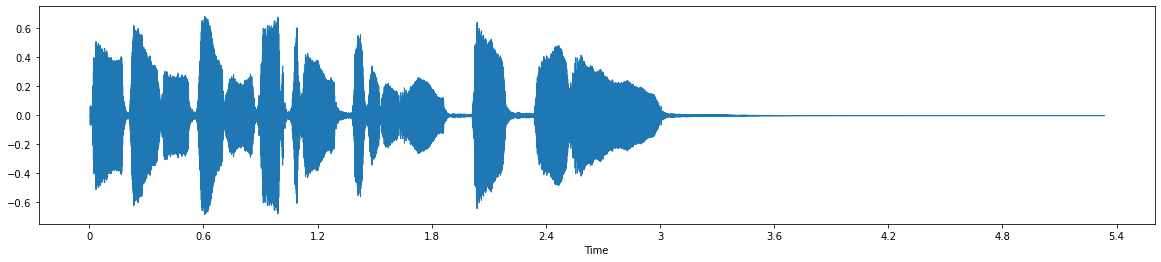

In [ ]:
plt.figure().set_figwidth(20)
librosa.display.waveshow(wav_arr, sr=sr) ;

In [ ]:
import numpy as np

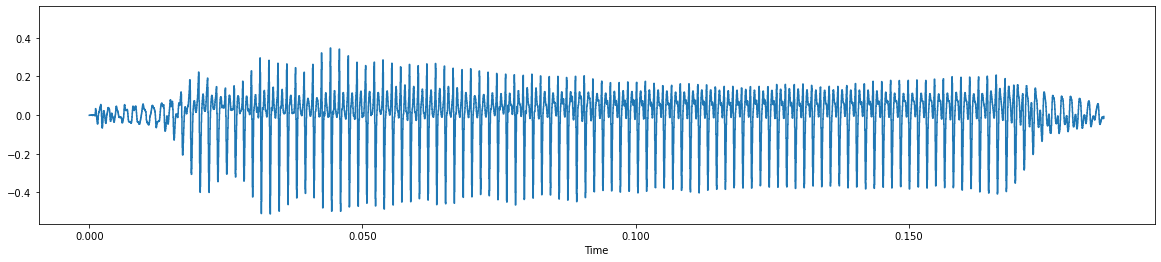

In [ ]:
dft_input = wav_arr[:4096]
plt.figure().set_figwidth(20)
librosa.display.waveshow(dft_input, sr=sr) ;

0.0 , 0.9999998528596039 (4096,)


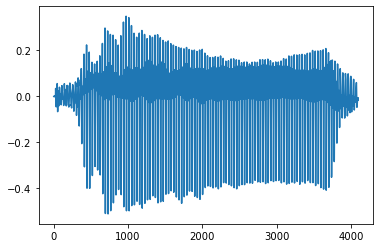

In [ ]:
window = np.hanning(len(dft_input))
print(window.min(),',', window.max(), window.shape)
plt.plot(range(len(dft_input)), dft_input);

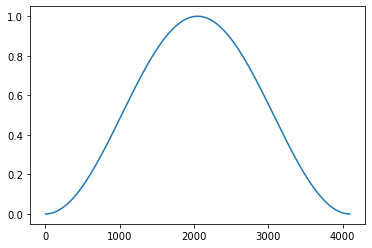

In [ ]:
plt.plot(range(len(window)), window);

In [ ]:
windowed_input = dft_input * window
print(windowed_input.min(),',', windowed_input.max(), windowed_input.shape)

-0.44643998570835974 , 0.2058525939820195 (4096,)


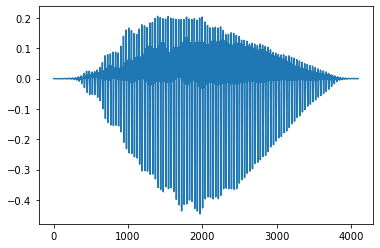

In [ ]:
plt.plot(range(len(windowed_input)), windowed_input);

In [ ]:
dft = np.fft.rfft(windowed_input)
print(dft.min(),',', dft.max(), dft.shape)

(-68.8497922728664+2.5538387571915884j) , (130.198766173698+3.207501188060329j) (2049,)


In [ ]:
amplitude = np.abs(dft)
print(amplitude.min(),',', amplitude.max(), amplitude.shape)

5.428852204728936e-07 , 130.23826924919072 (2049,)


In [ ]:
amplitude_db = librosa.amplitude_to_db(amplitude, ref=np.max)
print(amplitude_db.min(),',', amplitude_db.max(), amplitude_db.shape)

-80.0 , 0.0 (2049,)


In [ ]:
frequency = librosa.fft_frequencies(sr=sr, n_fft=len(dft_input))
print(frequency.min(),',', frequency.max(), frequency.shape)

0.0 , 11025.0 (2049,)


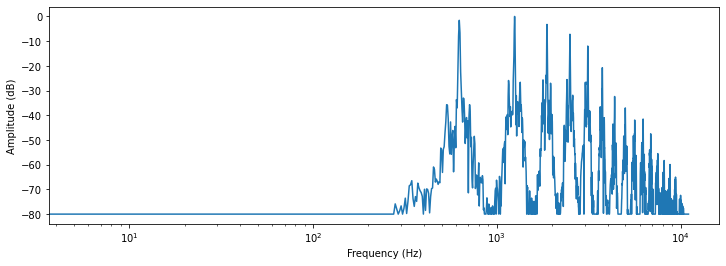

In [ ]:
plt.figure().set_figwidth(12)
plt.plot(frequency, amplitude_db);
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (dB)")
plt.xscale("log")